# **1. Setup**

# PARTE 1 - DESARROLLO

## Establecer Entorno de Trabajo

In [1]:
# Check python version
import sys
sys.version

'3.9.18 (main, Sep 11 2023, 13:21:18) \n[GCC 11.2.0]'

In [2]:
!nvidia-smi

Sun Jun  9 23:12:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:01:00.0  On |                  N/A |
| 50%   59C    P5              20W / 170W |    625MiB / 12288MiB |     33%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Instalacion de paquetes necesarios

In [3]:
# Install pytorch for python 3.10 with CUDA 11.8 support
!pip3 install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
!pip install Pillow==9.4.0
!pip show pillow #check pillow version

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /home/merve/anaconda3/lib/python3.9/site-packages
Requires: 
Required-by: bokeh, datashader, imageio, matplotlib, scikit-image, torchvision


In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [6]:
# !mkdir /content/gdrive/My\ Drive/P1aplicacionesIA

In [7]:
# !ls /content/gdrive/My\ Drive/P1aplicacionesIA

In [8]:
#move to a specific directory
# import os
# os.chdir('/content/gdrive/My Drive/P1aplicacionesIA/')
# !pwd

# **2. Carga de conjuntos de datos/imágenes (datasets)**

## Manejo de Datasets


### Datasets por defecto

#### Descarga CIFAR10

In [9]:
import subprocess
import os
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import time
from torch.utils.data import random_split


In [10]:
# standard cast into Tensor and pixel values normalization in [-1, 1] range
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# resizing factor
resize_factor = 128

# extra train transform with resizing and other augmentations
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(resize_factor),  # Add resizing here
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    torchvision.transforms.RandomCrop(resize_factor, padding=4, padding_mode='reflect'), 
    torchvision.transforms.RandomHorizontalFlip(), 
])


download_dir = './data' #download directory

trainset = torchvision.datasets.CIFAR10(
    root=download_dir, train=True, download=True, transform=train_transform
)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size

trainset, validationset = random_split(trainset, [train_size, val_size])

testset = torchvision.datasets.CIFAR10(
    root=download_dir, train=False, download=True, transform=transform
)

# print the size of the datasets
print('Train dataset with ' + str(len(trainset)) + ' images')
print('Validation dataset with ' + str(val_size) + ' images')
print('Test dataset with ' + str(len(testset)) + ' images')

Files already downloaded and verified
Files already downloaded and verified
Train dataset with 40000 images
Validation dataset with 10000 images
Test dataset with 10000 images


In [11]:
# number of samples/images per group
batch_size = 56

#load & convert images to tensors in Python
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True, num_workers=2)
trainloader_len = len(trainloader)

validationloader = torch.utils.data.DataLoader(validationset, batch_size, shuffle=False, num_workers=2)
validationloader_len = len(validationloader)

testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False, num_workers=2)
testloader_len = len(testloader)

classes = ('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Loaders done.')
print('Each batch with ' + str(batch_size) + ' samples/images')
print(f"Train dataset with {trainloader_len} batches")
print(f"Validation dataset with {validationloader_len} batches")
print(f"Test dataset with {testloader_len} batches")
print('Available classes:')
print(classes)

Loaders done.
Each batch with 56 samples/images
Train dataset with 715 batches
Validation dataset with 179 batches
Test dataset with 179 batches
Available classes:
('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#### Visualización

In [12]:
# function to un-normalize and display an image
def imshow(img):
  img = img / 2 + 0.5 #desnormalizar
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

Labels for the first 9 images:
deer truck truck plane horse horse car horse deer 

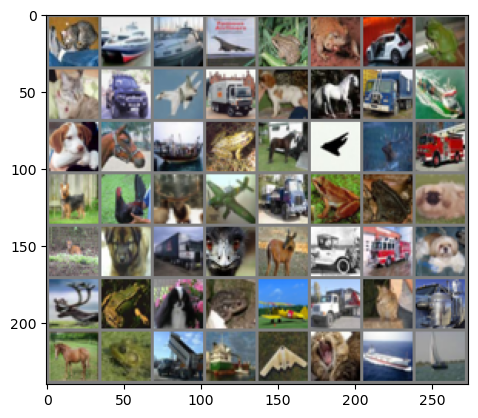

In [13]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Concatenate images
imgconcat = torchvision.utils.make_grid(images)

# Show image
imshow(imgconcat)

print("Labels for the first 9 images:")

for i in range(len(labels[:9])):
  print(classes[labels[i]], end=' ')

Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


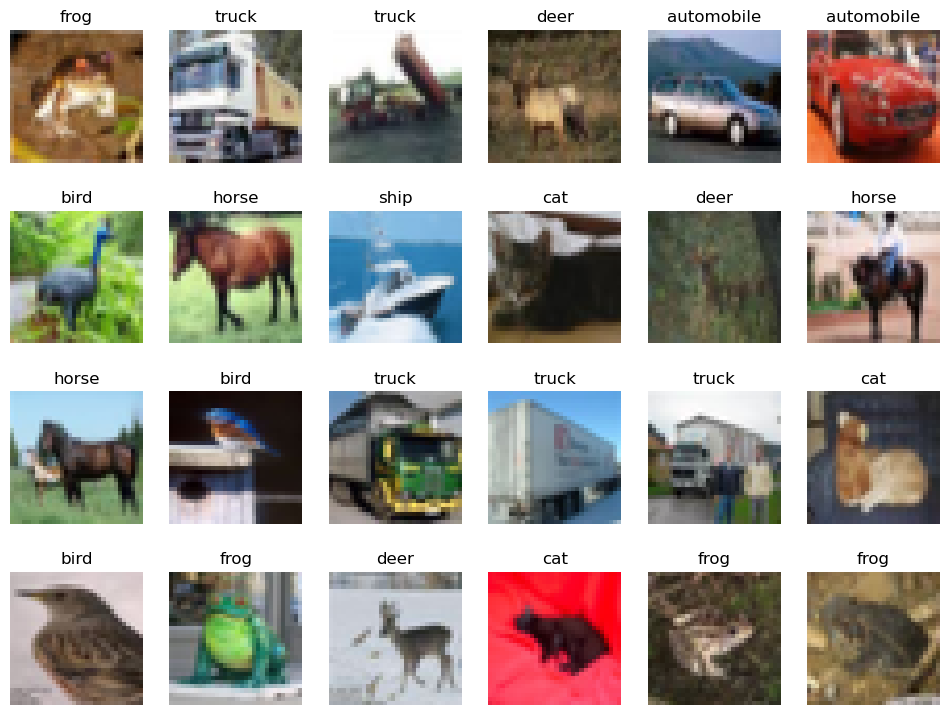

In [14]:
rows = 4
cols = 6
# Get class labels directly from the dataset
# Get class labels from the original dataset used for splitting
original_dataset = torchvision.datasets.CIFAR10(root=download_dir, train=True, download=True)  # Assuming download_dir is set

class_labels = original_dataset.classes  # Access classes from original dataset
print(class_labels)

# Create the Matplotlib figure and subplots
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))

for x in range(rows):
    for y in range(cols):
        rnd_idx = x * cols + y

        # Access class label directly using index
        class_label = class_labels[original_dataset.targets[rnd_idx]]
        axs[x, y].set_title(class_label)
        axs[x, y].imshow(original_dataset.data[rnd_idx])
        axs[x, y].set_axis_off()


### Bonus Transformaciones de Los Datos

 frog


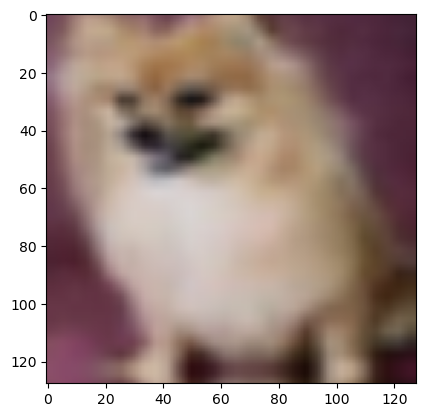

In [15]:
#load a sample batch from previous section
dataiter = iter(trainloader)
images, labels = next(dataiter)

#display first image of the batch
imshow(images[0])
print ('%5s' % classes[labels[0]])

 frog


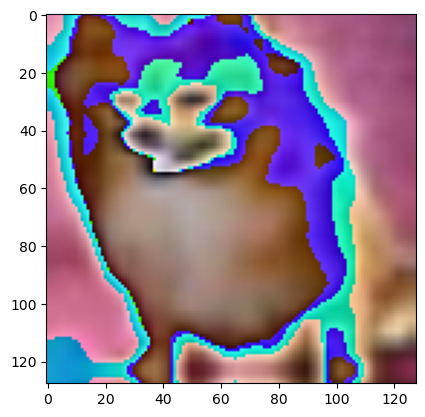

In [16]:
to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)
print ('%5s' % classes[labels[0]])

# **3. Definición de la red neuronal convolucional**

In [17]:
# Define the network
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global average pooling
            nn.Flatten(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.classifier(x)
        return x

# Instantiate the model
if torch.cuda.is_available():
    model = MyNet().cuda()
else:
    model = MyNet()

# Print the summary of the model
print(model)

MyNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, 

In [18]:
# Percentage of training set to use as validation
valid_size = 0.2

# Obtain training indices that will be used for validation
num_train = len(trainset)
indices = list(range(num_train))

# Split indices for training and validation using random shuffling
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx = indices[split:]
valid_idx = indices[:split]

# Define samplers using RandomSampler
TRAIN_SAMPLER = torch.utils.data.RandomSampler(trainset)
VALID_SAMPLER = torch.utils.data.RandomSampler(validationset)

# Number of subprocesses to use for data loading
NUM_WORKERS = 2

def data_loaders(trainset, validationset, testset, size):
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=size, 
        sampler=TRAIN_SAMPLER, num_workers=NUM_WORKERS
    )
    validationloader = torch.utils.data.DataLoader(
        validationset, batch_size=size, 
        sampler=VALID_SAMPLER, num_workers=NUM_WORKERS
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=size, num_workers=NUM_WORKERS
    )

    return trainloader, validationloader, testloader


In [19]:
def train_cifar(model, trainloader, validationloader, epochs, criterion, optimizer, device):
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf

    for epoch in range(epochs):
        # Initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        # Set the model to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(trainloader):
            # Move the data and target to the device
            data, target = data.to(device), target.to(device)

            # Zero the gradients
            optimizer.zero_grad()
            # Perform forward pass
            output = model(data)
            # Compute the loss
            loss = criterion(output, target)
            # Perform backward pass
            loss.backward()
            # Perform optimization
            optimizer.step()
            # Update the training loss
            train_loss += loss.item() * data.size(0)

        # Set the model to evaluation mode
        correct = 0
        model.eval()
        for batch_idx, (data, target) in enumerate(validationloader):
            # Move the data and target to the device
            data, target = data.to(device), target.to(device)

            # Perform forward pass
            output = model(data)
            # Compute the loss
            loss = criterion(output, target)
            # Update the validation loss
            valid_loss += loss.item() * data.size(0)
            # Calculate accuracy
            _, predicted = torch.max(output.data, 1)
            correct += (predicted == target).sum().item()

        # Print the training loss with accuracy
        train_loss = train_loss / len(trainloader.sampler)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
        print('\t\tTraining Accuracy: %2d%%' % (
            100. * correct / len(validationloader.sampler)))



        # Print the validation loss with accuracy
        valid_loss = valid_loss / len(validationloader.sampler)
        print('Epoch: {} \tValidation Loss: {:.6f}'.format(epoch+1, valid_loss))
        print('\t\tValidation Accuracy: %2d%% (%2d/%2d)' % (
            100. * correct / len(validationloader.sampler), correct, len(validationloader.sampler)))

        # Save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss
            ))
            torch.save(model.state_dict(), 'model_cifar.pt')
            valid_loss_min = valid_loss

    return model

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
# Defination test function
def test_accuracy(model, testloader, device):
    # Initialize variables for accuracy calculation
    correct = 0
    total = 0

    # Set the model to evaluation
    model.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    
    return 100 * correct / total

# Print the accuracy
#print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [22]:
# Defination test accuracy function per class
def test_accuracy_per_class(model, testloader, device):
    # Prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # Set the model to evaluation
    model.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            # Collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1
    
    # Print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

In [23]:
# Run with time measurement to know how long it takes
start_time = time.time()
trained_model2 = train_cifar(model, trainloader, validationloader, epochs=5, criterion=criterion, optimizer=optimizer, device=device)
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")

# Load the saved model
trained_model2.load_state_dict(torch.load('model_cifar.pt'))

# Evaluate overall accuracy
start_time2 = time.time()
test_acc2 = test_accuracy(trained_model2, testloader, device)
end_time2 = time.time()
print(f"Overall Test Accuracy: {test_acc2:.2f}%")
print(f"Testing time: {end_time2 - start_time2} seconds")


Epoch: 1 	Training Loss: 1.645630
		Training Accuracy: 48%
Epoch: 1 	Validation Loss: 1.448597
		Validation Accuracy: 48% (4867/10000)
Validation loss decreased (inf --> 1.448597).  Saving model ...
Epoch: 2 	Training Loss: 1.348067
		Training Accuracy: 54%
Epoch: 2 	Validation Loss: 1.284189
		Validation Accuracy: 54% (5457/10000)
Validation loss decreased (1.448597 --> 1.284189).  Saving model ...
Epoch: 3 	Training Loss: 1.242599
		Training Accuracy: 53%
Epoch: 3 	Validation Loss: 1.315434
		Validation Accuracy: 53% (5319/10000)
Epoch: 4 	Training Loss: 1.168146
		Training Accuracy: 57%
Epoch: 4 	Validation Loss: 1.204950
		Validation Accuracy: 57% (5724/10000)
Validation loss decreased (1.284189 --> 1.204950).  Saving model ...
Epoch: 5 	Training Loss: 1.106640
		Training Accuracy: 58%
Epoch: 5 	Validation Loss: 1.261349
		Validation Accuracy: 58% (5882/10000)
Training time: 803.8003034591675 seconds
Overall Test Accuracy: 18.56%
Testing time: 0.9722962379455566 seconds


In [24]:
# Evaluate class-wise accuracy
start_time3 = time.time()
classes = trainset.dataset.classes
test_accuracy_per_class(trained_model2, testloader, device)
end_time3 = time.time()
print(f"Class-wise testing time: {end_time3 - start_time3} seconds")

Accuracy for class airplane is: 40.2 %
Accuracy for class automobile is: 0.4 %
Accuracy for class bird  is: 64.9 %
Accuracy for class cat   is: 0.0 %
Accuracy for class deer  is: 4.1 %
Accuracy for class dog   is: 0.0 %
Accuracy for class frog  is: 0.5 %
Accuracy for class horse is: 67.7 %
Accuracy for class ship  is: 5.3 %
Accuracy for class truck is: 2.5 %
Class-wise testing time: 1.2153422832489014 seconds
